In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list

In [11]:
df_idf = pd.read_csv('tdidf.csv')
df_cond= pd.read_csv('cond_prob.csv')

In [12]:
cards =[ 'Teysa Karlov',
          'Blood Artist',
          'Cruel Celebrant',
          'The Meathook Massacre',
          'Master of Dark Rites',
          'Carmen, Cruel Skymarcher',
          'Bitterblossom',
          'Sol Ring',
          'Lathril, Blade of the Elves',
         'Marwyn, the Nurturer',
         'Elven Ambush',
        'Priest of Titania']


/var/folders/_v/11c2y9b932l_09kgbz74rhwm0000gn/T/ipykernel_53396/3648699162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_red = df_idf[df_idf.token.isin(cards)][df_idf.token_2.isin(cards)]


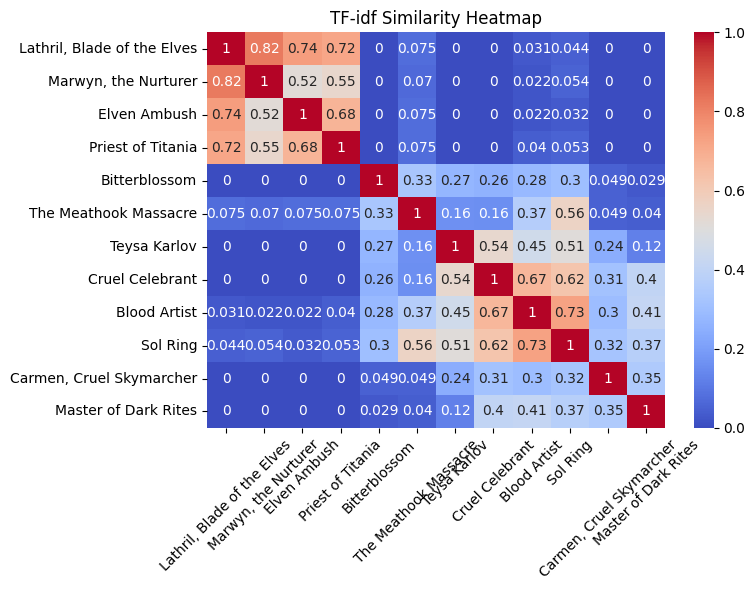

In [18]:

df_red = df_idf[df_idf.token.isin(cards)][df_idf.token_2.isin(cards)]
# Pivot the data to create a square correlation matrix
pivot_df = df_red.pivot(index='token', columns='token_2', values='similarity')

# Since pivot might not fill all cells (missing self correlations or others), we fill with 1s for true diagonal, and 0 or NaN elsewhere
pivot_df = pivot_df.reindex(columns=pivot_df.index.union(pivot_df.columns), 
                            index=pivot_df.index.union(pivot_df.columns), fill_value=0)
pivot_df = pivot_df.fillna(0)
# Fill the diagonal with 1s (since diagonals represent self-correlation)
for col in pivot_df.columns:
    pivot_df.at[col, col] = 1

for col in pivot_df.columns:
    pivot_df.at[col, col] = 1

# Perform hierarchical clustering to reorder rows and columns
corr_matrix = pivot_df.values
linkage_method = 'average'  # You can choose 'single', 'complete', 'average', etc.

# Compute linkage for both rows and columns
linkage_rows = linkage(corr_matrix, method=linkage_method)
linkage_cols = linkage(corr_matrix.T, method=linkage_method)

# Determine the order of rows and columns based on clustering
ordered_rows = leaves_list(linkage_rows)
ordered_cols = leaves_list(linkage_cols)

# Reorder the DataFrame
ordered_pivot_df = pivot_df.iloc[ordered_rows, ordered_cols]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ordered_pivot_df, annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1)

# Add labels and title
plt.title('TF-idf Similarity Heatmap')
plt.yticks(rotation=0)  # To keep y-axis labels horizontal
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/_v/11c2y9b932l_09kgbz74rhwm0000gn/T/ipykernel_53396/4049142129.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_red = df_cond[df_cond.token.isin(cards)][df_cond.token_2.isin(cards)]


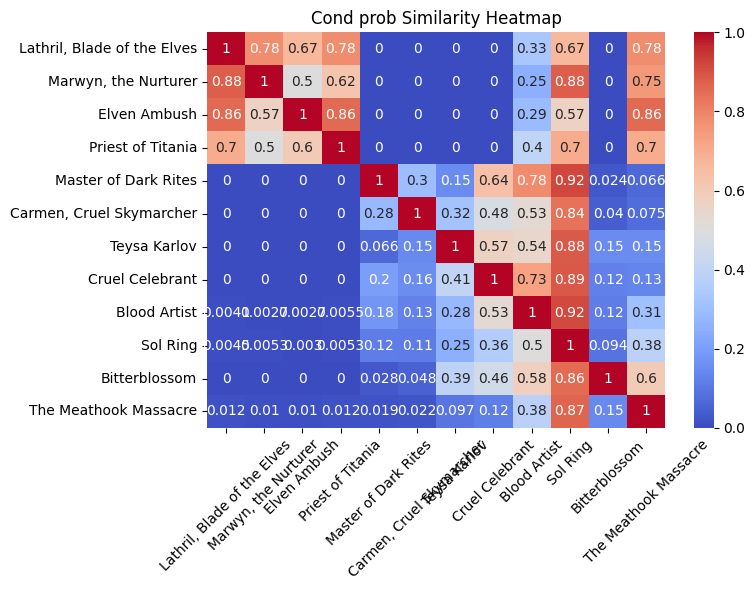

In [20]:

df_red = df_cond[df_cond.token.isin(cards)][df_cond.token_2.isin(cards)]
# Pivot the data to create a square correlation matrix
pivot_df = df_red.pivot(index='token', columns='token_2', values='similarity')

# Since pivot might not fill all cells (missing self correlations or others), we fill with 1s for true diagonal, and 0 or NaN elsewhere
pivot_df = pivot_df.reindex(columns=pivot_df.index.union(pivot_df.columns), 
                            index=pivot_df.index.union(pivot_df.columns), fill_value=0)
pivot_df = pivot_df.fillna(0)
# Fill the diagonal with 1s (since diagonals represent self-correlation)
for col in pivot_df.columns:
    pivot_df.at[col, col] = 1

for col in pivot_df.columns:
    pivot_df.at[col, col] = 1

# Perform hierarchical clustering to reorder rows and columns
corr_matrix = pivot_df.values
linkage_method = 'average'  # You can choose 'single', 'complete', 'average', etc.

# Compute linkage for both rows and columns
linkage_rows = linkage(corr_matrix, method=linkage_method)


# Determine the order of rows and columns based on clustering
ordered_rows = leaves_list(linkage_rows)


# Reorder the DataFrame
ordered_pivot_df = pivot_df.iloc[ordered_rows, ordered_rows]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ordered_pivot_df, annot=True, cmap="coolwarm", cbar=True, vmin=0, vmax=1)

# Add labels and title
plt.title('Cond prob Similarity Heatmap')
plt.yticks(rotation=0)  # To keep y-axis labels horizontal
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

# What to observe?

1. Sol Ring difference
2. Should i use The meathook massacre in my elves deck? ... Apparently is just an good card that is used in a lot of decks, but not always have synergy 